In [1]:
data1 = pd.read_csv('2015-2016.csv')
data2 = pd.read_csv('2017.csv')

In [2]:
data = pd.concat([data1, data2], axis=0)
data = data.reset_index(drop=True)

In [3]:
data.iloc[21469, :]

商品コード        3-978
売上日       20160331
伝票No        205667
得意先コード        m997
数量             (3)
単価             NaN
売上               0
Name: 21469, dtype: object

In [4]:
data = data.drop(axis=0, index=21469)
data = data.reset_index(drop=True)

In [5]:
for obj_col in ['数量', '単価', '売上']:
    data[obj_col] = data[obj_col].str.replace(',', '')
    data[obj_col] = data[obj_col].str.replace('(', '')
    data[obj_col] = data[obj_col].str.replace(')', '')

In [6]:
data['数量'] = data['数量'].astype('int')
data['単価'] = data['単価'].astype('int')
data['売上'] = data['売上'].astype('int')

In [7]:
from datetime import date
import datetime

In [8]:
extract_year = lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").isocalendar()[0]
data['年'] = data['売上日'].map(extract_year)

In [9]:
extract_month = lambda x: str(x)[4:6]
data['月'] = data['売上日'].map(extract_month)

In [10]:
extract_week = lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").isocalendar()[1]
data['週'] = data['売上日'].map(extract_week)

In [11]:
extract_youbi = lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").isocalendar()[2]
data['曜日'] = data['売上日'].map(extract_youbi)

In [12]:
data['年'] = data['年'].astype(int)
data['月'] = data['月'].astype(int)
data['週'] = data['週'].astype(int)
data['曜日'] = data['曜日'].astype(int)

In [13]:
data['年度'] = data['年']
data.loc[data['月'] == 1, '年度'] -= 1
data.loc[data['月'] == 2, '年度'] -= 1
data.loc[data['月'] == 3, '年度'] -= 1

In [14]:
data['日'] = [(datetime.datetime.strptime(str(x), "%Y%m%d") - datetime.datetime(y, 4, 1)).days + 1
               for x, y in zip(data['売上日'].values, data['年度'].values)]

In [15]:
data['年度'] = data['年度'].astype(int)
data['日'] = data['日'].astype(int)

In [16]:
data

,商品コード,売上日,伝票No,得意先コード,数量,単価,売上,年,月,週,曜日,年度,日
0,3-636,20150401,199943,135a,5,250,1250,2015,4,14,3,2015,1
1,3-819,20150401,199943,135a,5,250,1250,2015,4,14,3,2015,1
2,3-946,20150401,199944,135a,5,250,1250,2015,4,14,3,2015,1
3,2-001a,20150401,199945,135a,10,150,1500,2015,4,14,3,2015,1
4,2-002a,20150401,199945,135a,5,150,750,2015,4,14,3,2015,1
5,3-393a,20150401,199945,135a,5,250,1250,2015,4,14,3,2015,1
6,3-686a,20150401,199945,135a,5,250,1250,2015,4,14,3,2015,1
7,4-361a,20150401,199945,135a,5,150,750,2015,4,14,3,2015,1
8,4-362a,20150401,199945,135a,10,150,1500,2015,4,14,3,2015,1
9,3-467a,20150401,199946,135a,5,250,1250,2015,4,14,3,2015,1


In [17]:
#import pandas_profiling as pdp

In [18]:
#pdp.ProfileReport(data)

# ・売上の概観

In [19]:
output = None

In [61]:
def plot_three_bars(y1, y2, y3, title, xlabel, ylabel, legend1, legend2, legend3, output=None):
    w = 0.2
    x = np.arange(len(y1))

    plt.figure(figsize=(12, 9))
    plt.bar(x, y1, color='b', width=w, label=legend1, align="center")
    plt.bar(x + w, y2, color='g', width=w, label=legend2, align="center")
    plt.bar(x + 2*w, y3, color='r', width=w, label=legend3, align="center")
    plt.legend(loc="best")
    plt.xticks(x + w, x+1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if output != None:
        plt.savefig(output, dpi=200)
    plt.show()

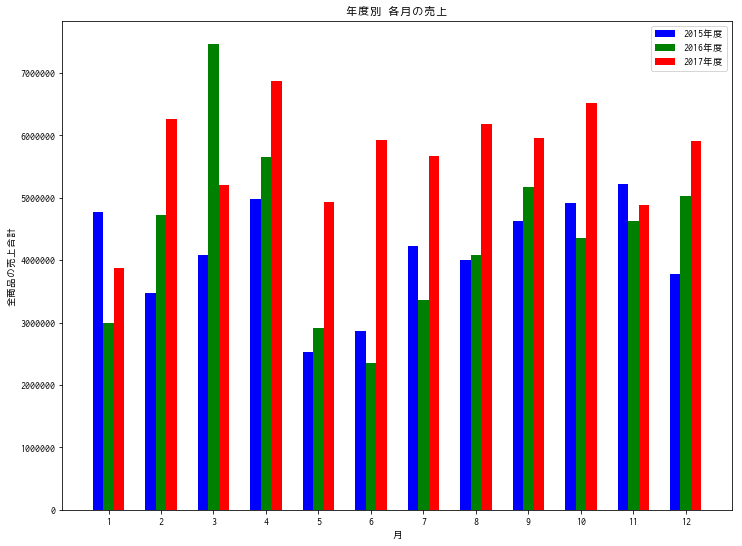

In [21]:
y1 = data.loc[data['年度'] == 2015, :].groupby(by='月')['売上'].sum().values
y2 = data.loc[data['年度'] == 2016, :].groupby(by='月')['売上'].sum().values
y3 = data.loc[data['年度'] == 2017, :].groupby(by='月')['売上'].sum().values
title = '年度別 各月の売上'
xlabel = '月'
ylabel = '全商品の売上合計'
legend1 = '2015年度'
legend2 = '2016年度'
legend3 = '2017年度'
#output = 'uriage_month'
plot_three_bars(y1, y2, y3, title, xlabel, ylabel, legend1, legend2, legend3, output)

53 53 53


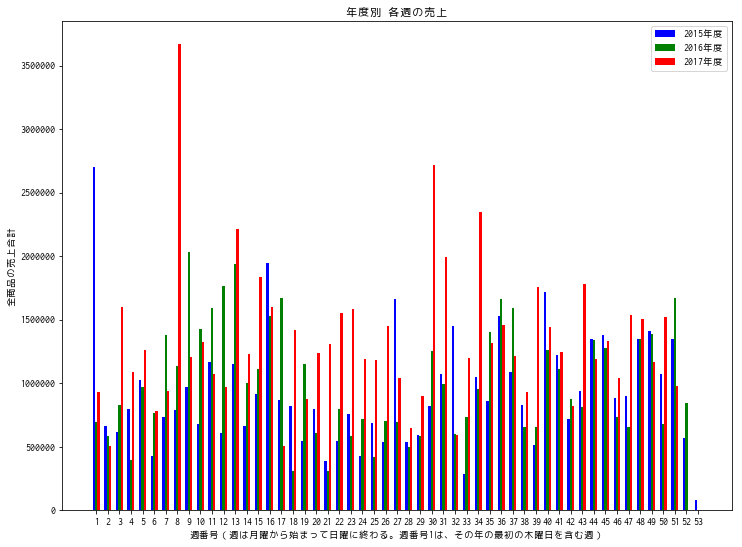

In [25]:
y1 = data.loc[data['年度'] == 2015, :].groupby(by='週')['売上'].sum().values
y2 = list(data.loc[data['年度'] == 2016, :].groupby(
    by='週')['売上'].sum().values)
y2.append(0)
y3 = list(data.loc[data['年度'] == 2017, :].groupby(
    by='週')['売上'].sum().values)
y3.extend([0, 0])
title = '年度別 各週の売上'
xlabel = '週番号（週は月曜から始まって日曜に終わる。週番号1は、その年の最初の木曜日を含む週）'
ylabel = '全商品の売上合計'
legend1 = '2015年度'
legend2 = '2016年度'
legend3 = '2017年度'
#output = 'uriage_week'
plot_three_bars(y1, y2, y3, title, xlabel, ylabel, legend1, legend2, legend3, output)

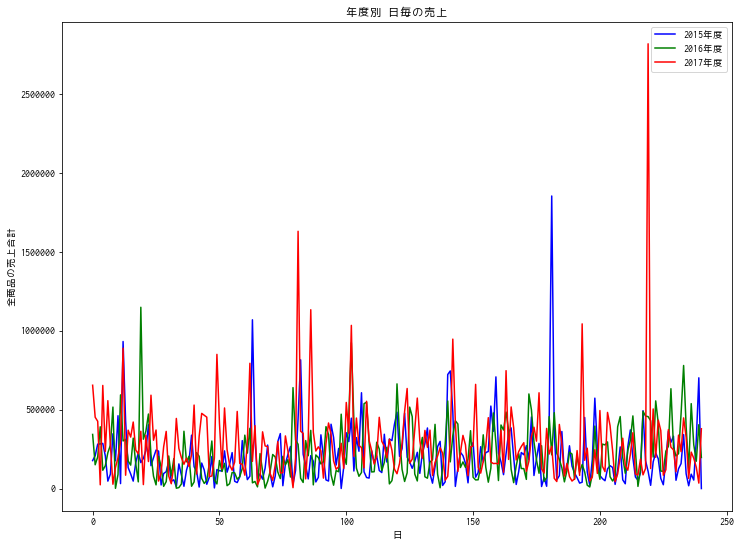

In [28]:
Y1 = list(data.loc[data['年度'] == 2015, :].groupby(
    by='日')['売上'].sum().values)
Y1.append(0)
Y2 = data.loc[data['年度'] == 2016, :].groupby(by='日')['売上'].sum().values
Y3 = data.loc[data['年度'] == 2017, :].groupby(by='日')['売上'].sum().values
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.plot(X, Y1, color='b', label='2015年度')
plt.plot(X, Y2, color='g', label='2016年度')
plt.plot(X, Y3, color='r', label='2017年度')
plt.legend(loc="best")
plt.title('年度別 日毎の売上')
plt.xlabel('日')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_date', dpi=200)
plt.show()

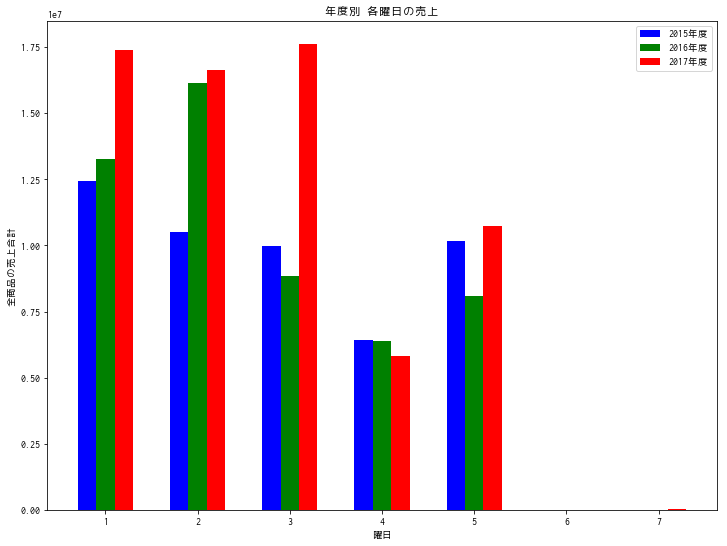

In [34]:
y1 = list(data.loc[data['年度'] == 2015, :].groupby(by='曜日')['売上'].sum().values)
y1.extend([0, 0])
y2 = list(data.loc[data['年度'] == 2016, :].groupby(by='曜日')['売上'].sum().values)
y2.extend([0, 0])
y3 = list(data.loc[data['年度'] == 2017, :].groupby(by='曜日')['売上'].sum().values)
y3.append(0)
y3[5], y3[6] = y3[6], y3[5]

title = '年度別 各曜日の売上'
xlabel = '曜日'
ylabel = '全商品の売上合計'
legend1 = '2015年度'
legend2 = '2016年度'
legend3 = '2017年度'
#output = 'uriage_dayOfTheWeek'
plot_three_bars(y1, y2, y3, title, xlabel, ylabel, legend1, legend2, legend3, output)

## 2年間のデータだけでは、需要予測は厳しそう

# ・得意先の概観

In [35]:
def Gini_index(target, main, xlab, ylab):
    n = len(target)
    target = sorted(target)
    target = np.array(target)
    target = target.cumsum()

    target_2 = target / max(target)
    target_3 = target_2.tolist()
    target_3.insert(0, 0)
    x = np.linspace(0, 1, n+1)
    x.tolist()

    plt.figure(figsize=(12, 9))
    plt.plot(x, target_3, label="ローレンツ曲線", color="red")
    plt.plot(x, x, label="完全平等線", color="blue")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(main)
    plt.legend(loc=2)
#    plt.savefig('uriage_tokuisaki', dpi=200)
    plt.show()

In [36]:
from scipy.stats import norm

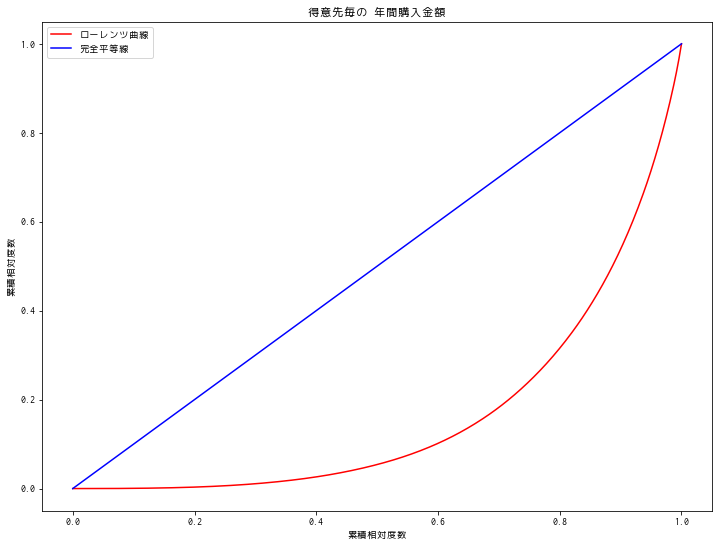

In [37]:
x = data.groupby(by='得意先コード').sum().sort_values(by='売上')['売上']
x = x.cumsum()
Gini_index(x, main="得意先毎の 年間購入金額", xlab="累積相対度数", ylab="累積相対度数")

## 少数の得意先が大半の売上を占めている  

## 各得意先からの発注時期は不規則（安定していない）
## つまり、売上の多くを占める得意先の内一つでも、発注時期を例年と変えるだけで、需要予測は的外れになる

# ・商品の概観

In [17]:
x = data.groupby(by='商品コード').sum().sort_values(by='売上')['売上']
x = x.cumsum()
Gini_index(x, main="商品毎の 年間購入金額", xlab="累積相対度数", ylab="累積相対度数")

NameError: name 'Gini_index' is not defined

In [18]:
data.groupby('商品コード').sum().sort_values('売上', ascending=False)

,売上日,伝票No,数量,単価,売上,年,月,週,曜日,年度,日
商品コード,,,,,,,,,,,
3-310a,53031246400,547210944,42663,608551,9535325,5302945,17550,71993,6730,5302287,496673
3-600a,52830479034,545430999,37967,607263,8564990,5282873,17078,69948,6630,5282145,508972
3-393a,46861479018,483647019,31808,534554,7103255,4685992,15225,62402,5717,4685368,445748
3-604a,44403885701,459510280,27162,509795,6171130,4440240,14510,59447,5488,4439673,416088
3-777a,40691922894,420713999,22039,464820,5011320,4069045,14416,59267,5230,4068623,379307
4-093a,29117861484,301343416,15671,331840,3563945,2911686,9790,40146,3612,2911331,274837
3-601a,23549872424,242252301,14613,269234,3302665,2354906,7939,32655,2941,2354636,217022
4-464a,27726105418,286303422,12638,320830,2837565,2772520,8841,36096,3467,2772182,246899
3-819,6411586187,65886300,12327,72458,2707413,641137,2112,8642,931,641070,55138


In [26]:
shouhins = data.groupby('商品コード').sum().sort_values('売上', ascending=False).index[:10].values

In [30]:
data.head()

,商品コード,売上日,伝票No,得意先コード,数量,単価,売上,年,月,週,曜日,年度,日
0,3-636,20150401,199943,135a,5,250,1250,2015,4,14,3,2015,1
1,3-819,20150401,199943,135a,5,250,1250,2015,4,14,3,2015,1
2,3-946,20150401,199944,135a,5,250,1250,2015,4,14,3,2015,1
3,2-001a,20150401,199945,135a,10,150,1500,2015,4,14,3,2015,1
4,2-002a,20150401,199945,135a,5,150,750,2015,4,14,3,2015,1


In [33]:
import sys

In [59]:
def plot_three_bars(ax, y1, y2, y3, title, xlabel, ylabel, legend1, legend2, legend3, output=None):
    w = 0.2
    x = np.arange(len(y1))

    ax.bar(x, y1, color='b', width=w, label=legend1, align="center")
    ax.bar(x + w, y2, color='g', width=w, label=legend2, align="center")
    ax.bar(x + 2*w, y3, color='r', width=w, label=legend3, align="center")
    ax.legend(loc="best")
#    ax.xticks(x + w, x+1)
#    ax.title(title)
#    ax.xlabel(xlabel)
#    ax.ylabel(ylabel)

    if output != None:
        plt.savefig(output, dpi=200)
    plt.show()
#    ax.show()

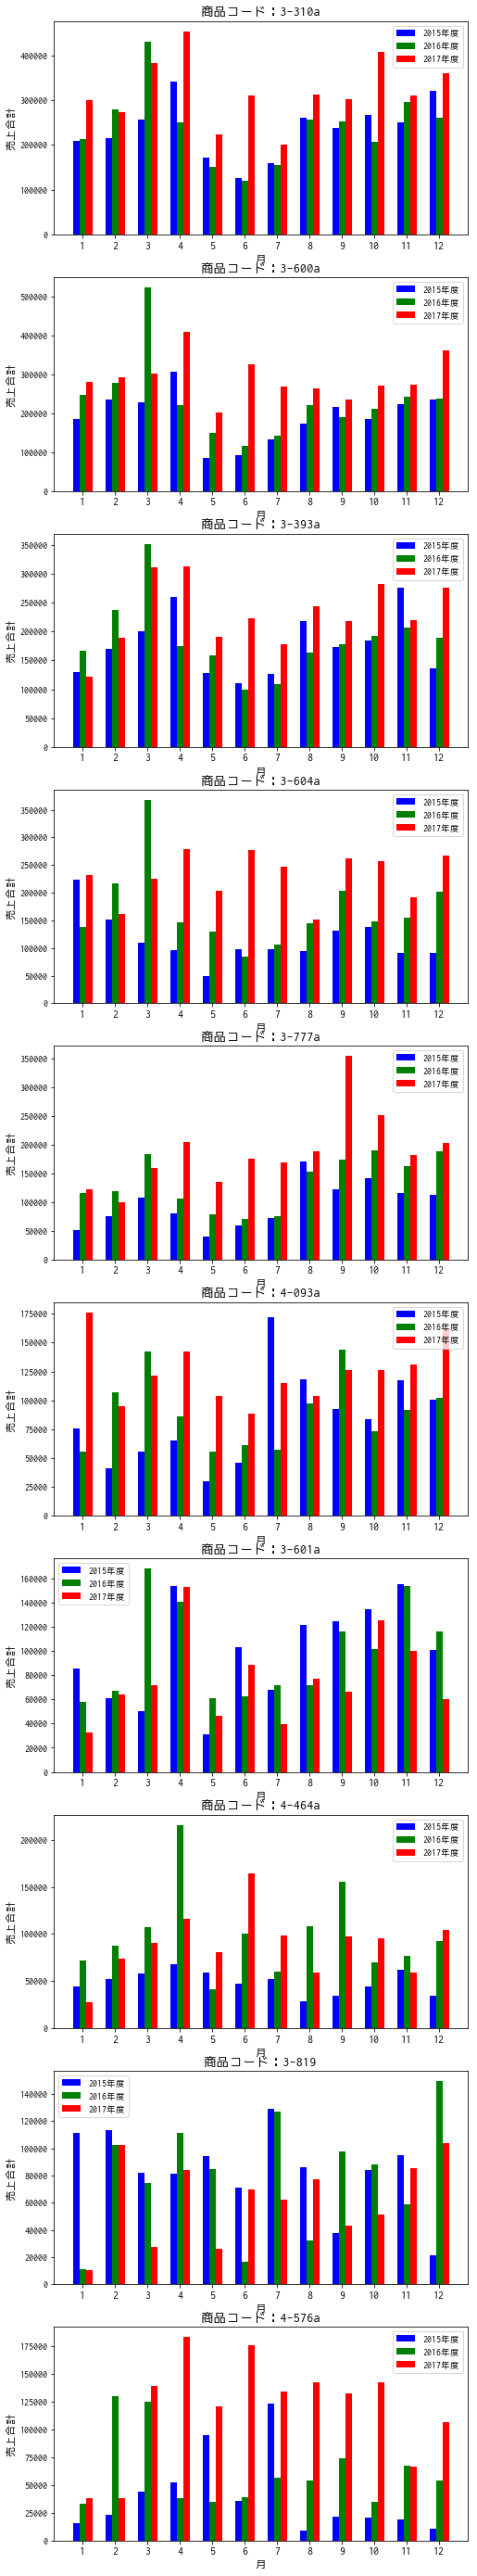

In [85]:
#fig, axes = plt.subplots(10, 1, figsize=(8, 60), sharex=True)
fig, axes = plt.subplots(10, 1, figsize=(8, 50))

for j, shouhin in enumerate(shouhins):
    tokuisaki = []
    for i, year in enumerate([2015, 2016, 2017]):
        tokuisaki.append(np.zeros(12))
        for day in data.query("年度 == @year and 商品コード == @shouhin").groupby(by='月').sum().index:
            tokuisaki[i][day - 1] = data.query(
                "年度 == @year and 商品コード == @shouhin").groupby(by='月').sum().loc[day, '売上']

    y1 = tokuisaki[0]
    y2 = tokuisaki[1]
    y3 = tokuisaki[2]
    title = '商品コード：' + shouhin
    xlabel = '月'
    ylabel = '売上合計'
    legend1 = '2015年度'
    legend2 = '2016年度'
    legend3 = '2017年度'
    output = 'shouhin_uriage_month'


    w = 0.2
    x = np.arange(len(y1))

    axes[j].bar(x, y1, color='b', width=w, label=legend1, align="center")
    axes[j].bar(x + w, y2, color='g', width=w, label=legend2, align="center")
    axes[j].bar(x + 2*w, y3, color='r', width=w, label=legend3, align="center")
    axes[j].legend(loc="best")
    axes[j].set_xticks(x+w)
    axes[j].set_xticklabels(x+1, fontsize='large')
    axes[j].set_title(title, fontsize='x-large')
    axes[j].set_xlabel(xlabel, fontsize='large')
    axes[j].set_ylabel(ylabel, fontsize='large')

if output != None:
    plt.savefig(output, dpi=200)
plt.show()

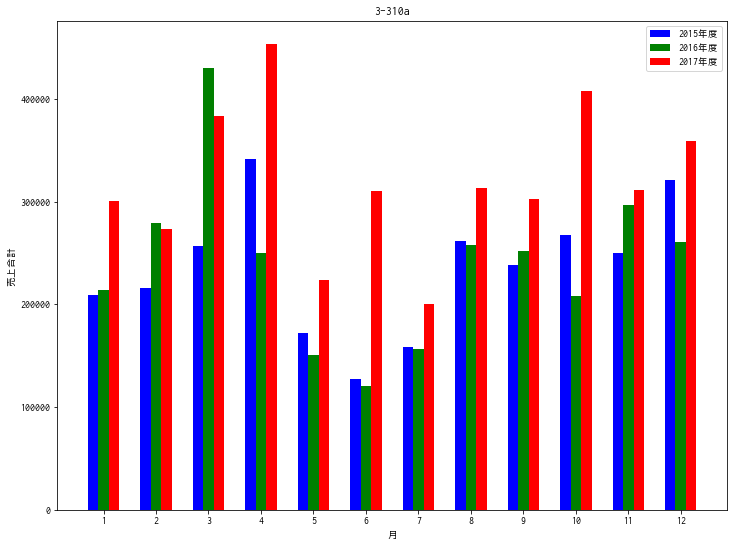

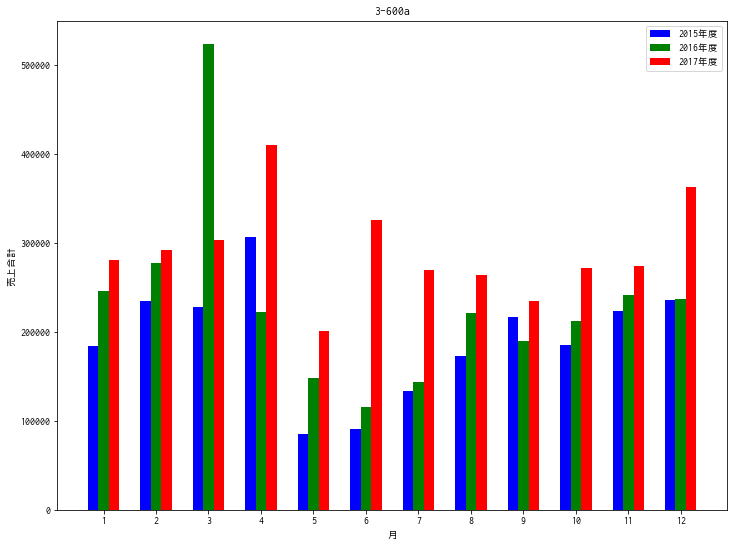

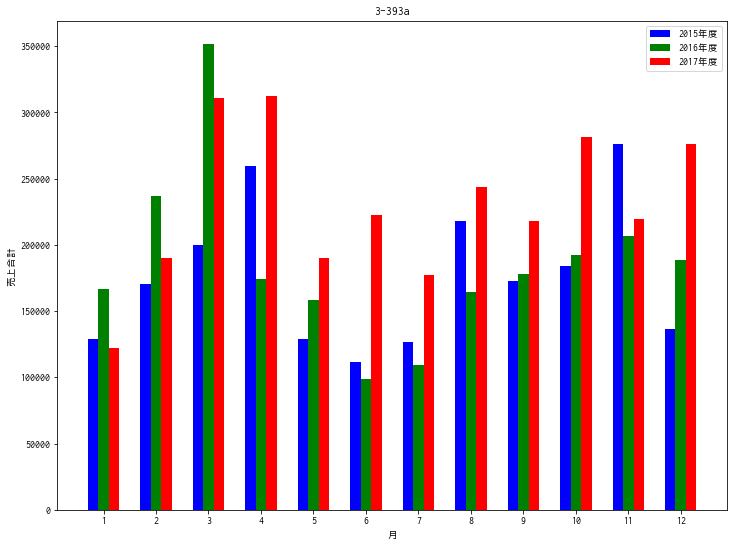

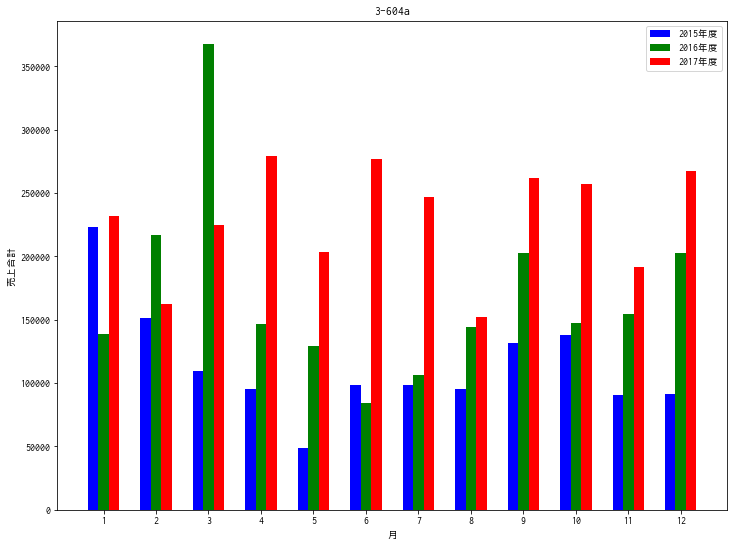

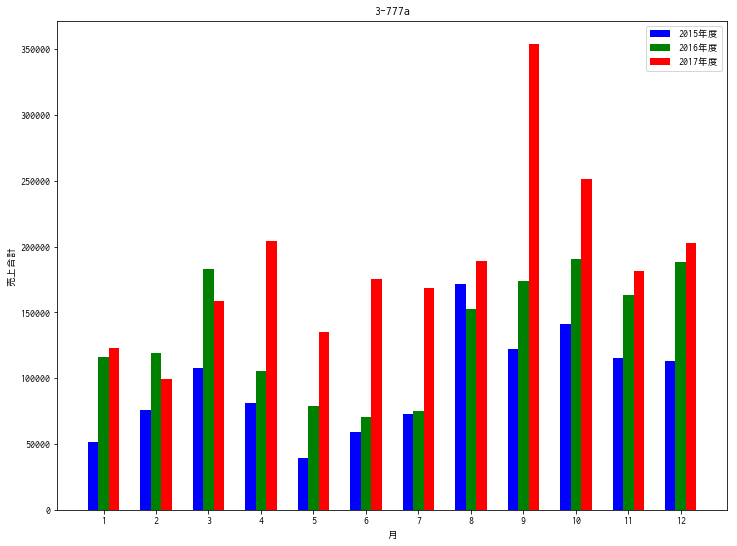

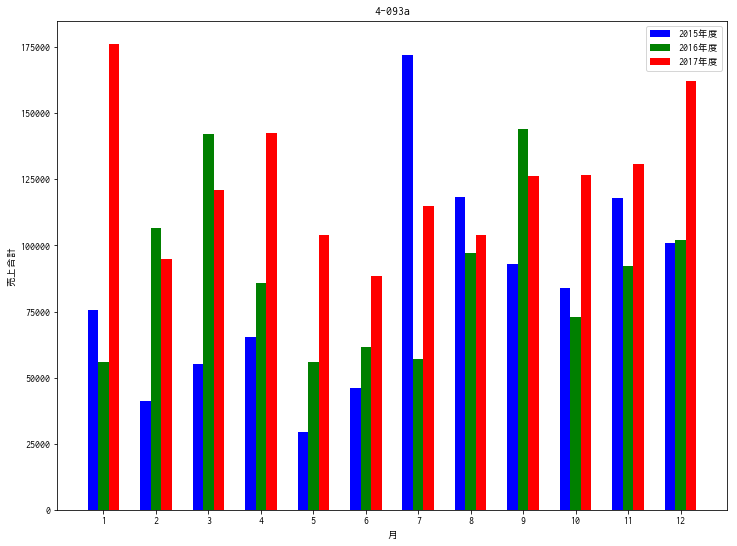

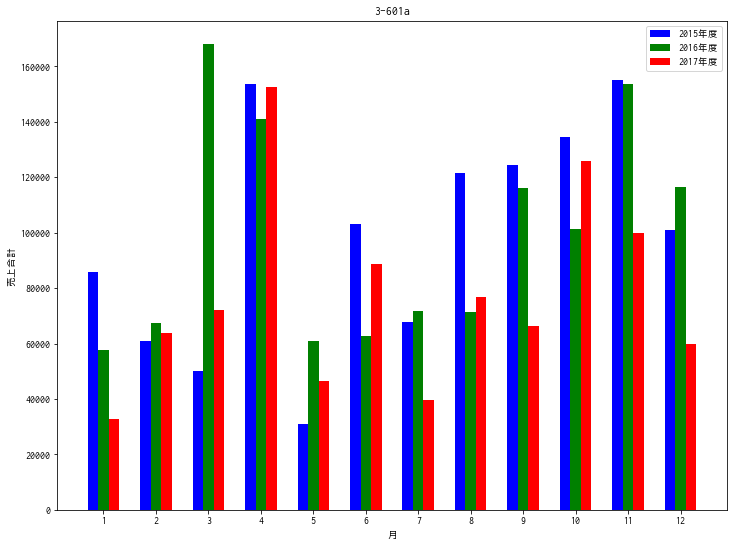

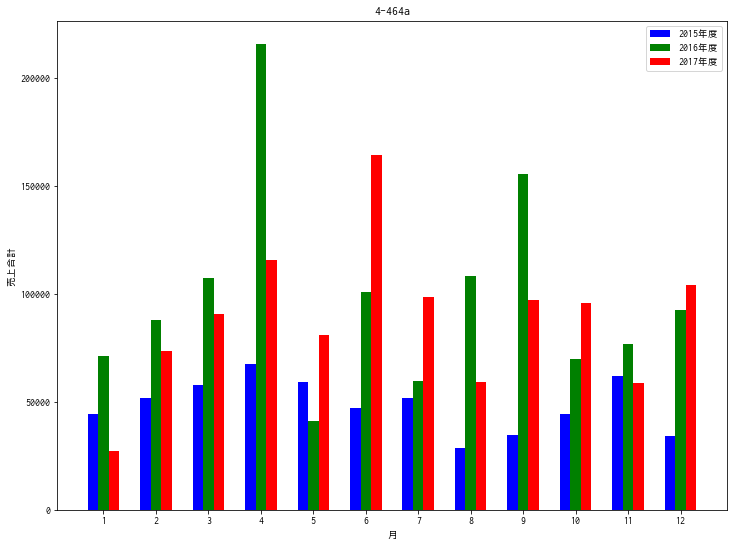

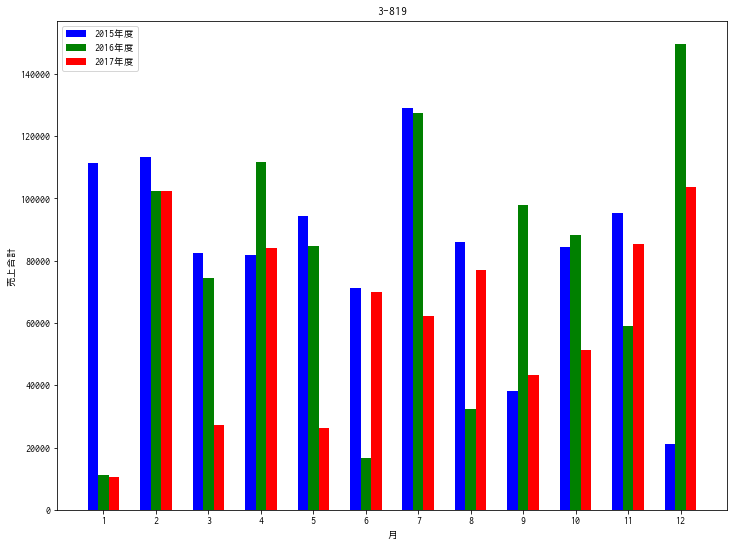

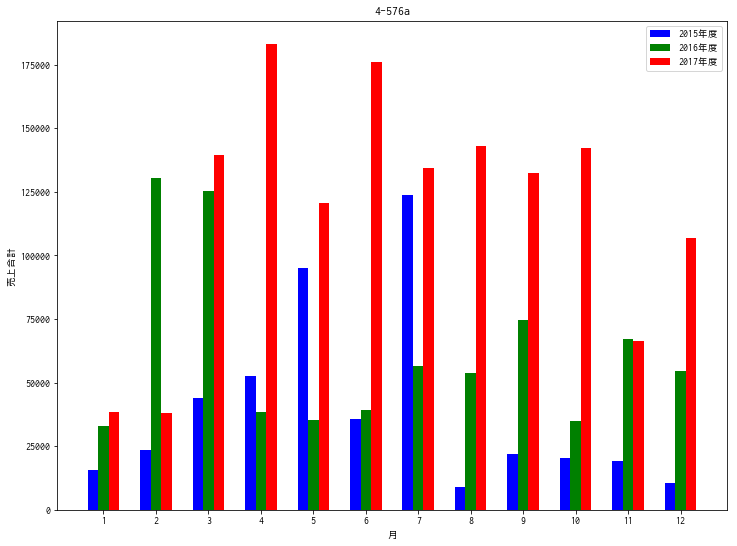

In [62]:
for shouhin in shouhins:
    tokuisaki = []
    for i, year in enumerate([2015, 2016, 2017]):
        tokuisaki.append(np.zeros(12))
        for day in data.query("年度 == @year and 商品コード == @shouhin").groupby(by='月').sum().index:
            tokuisaki[i][day - 1] = data.query(
                "年度 == @year and 商品コード == @shouhin").groupby(by='月').sum().loc[day, '売上']

    y1 = tokuisaki[0]
    y2 = tokuisaki[1]
    y3 = tokuisaki[2]
    title = shouhin
    xlabel = '月'
    ylabel = '売上合計'
    legend1 = '2015年度'
    legend2 = '2016年度'
    legend3 = '2017年度'
    output = 'shouhin_uriage_month'
    plot_three_bars(y1, y2, y3, title, xlabel, ylabel, legend1, legend2, legend3, output)

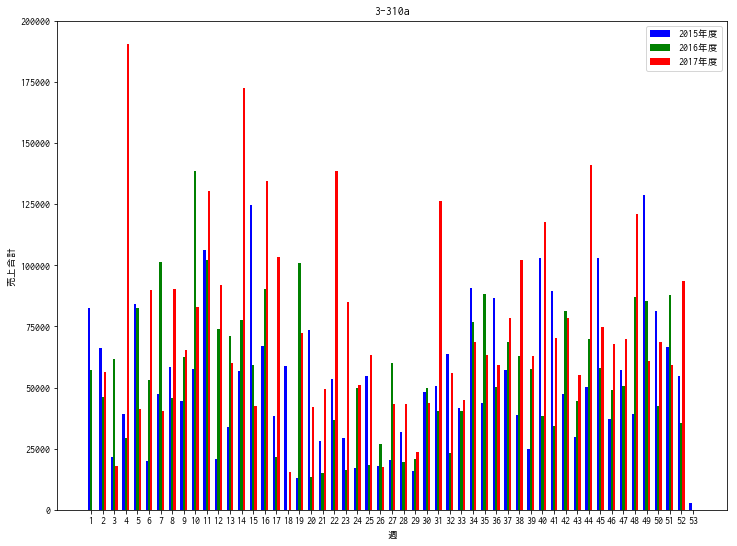

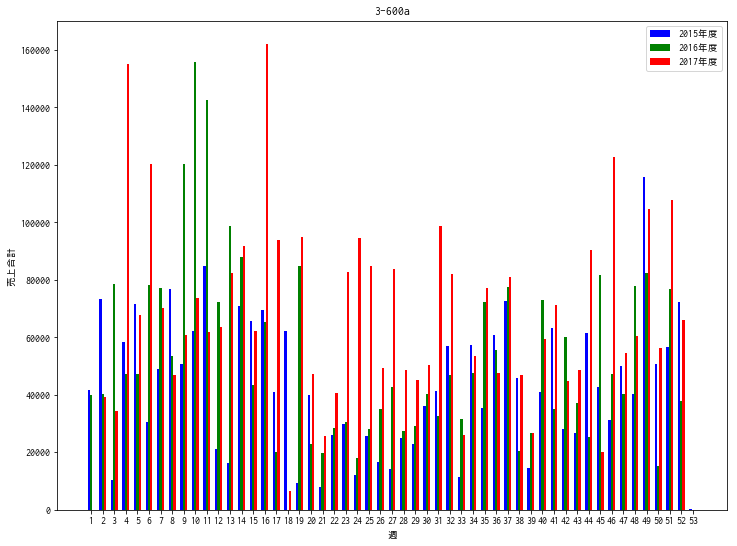

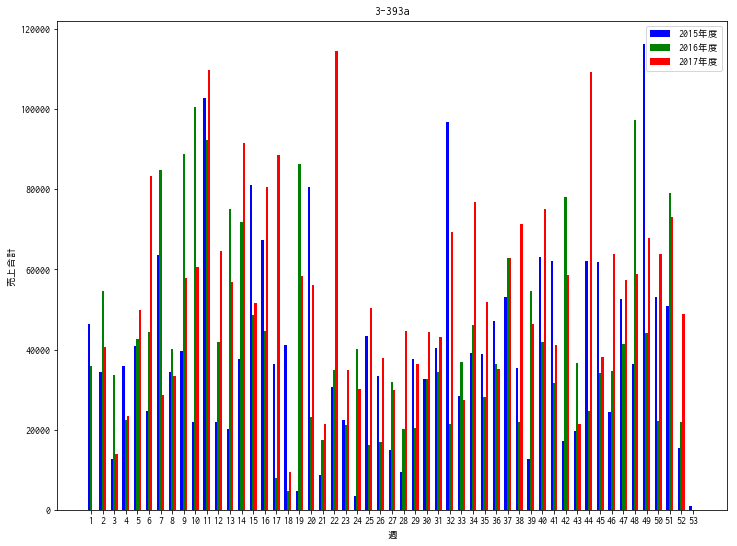

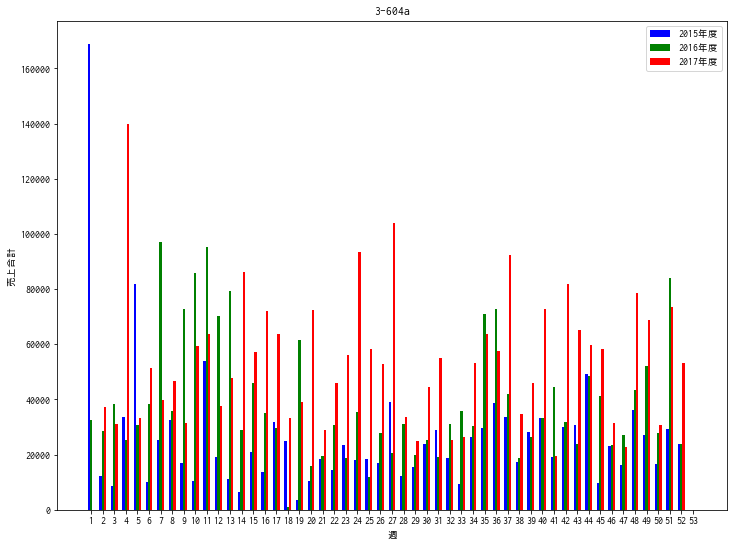

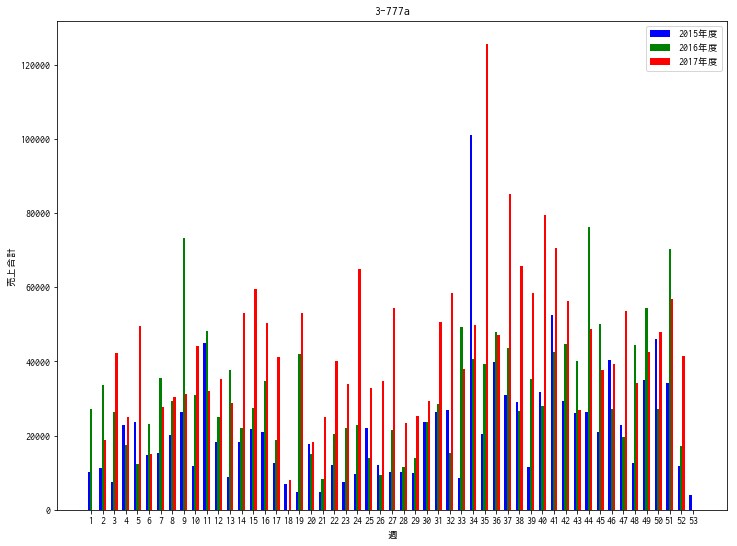

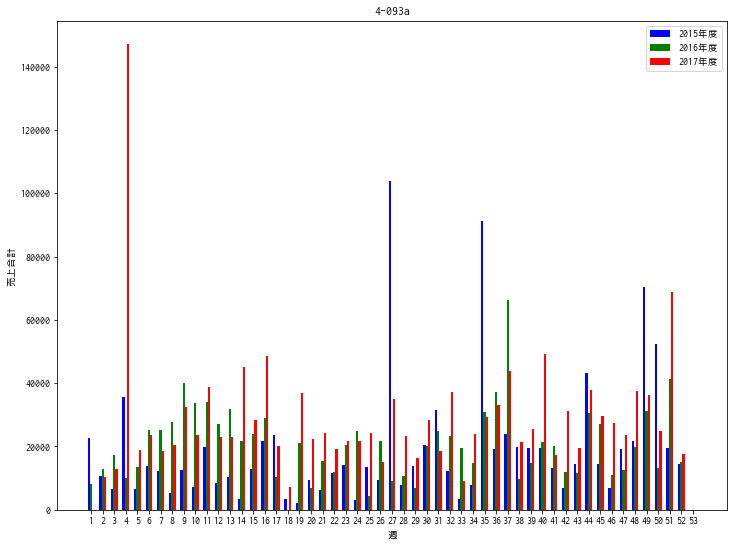

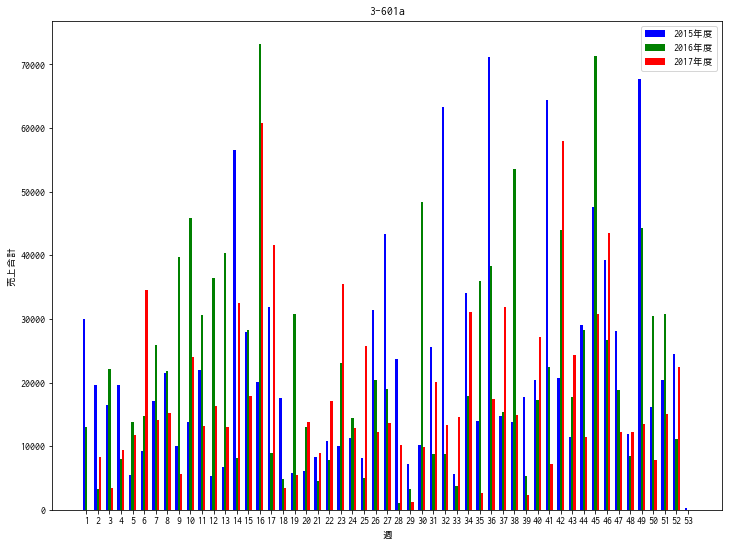

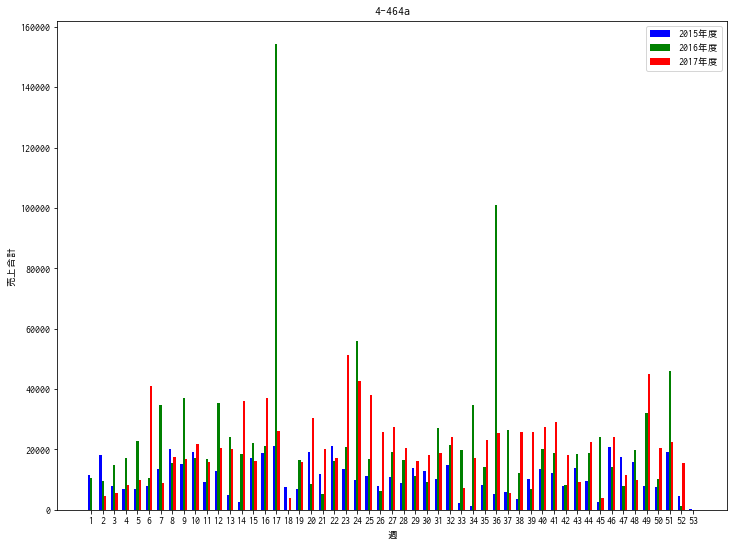

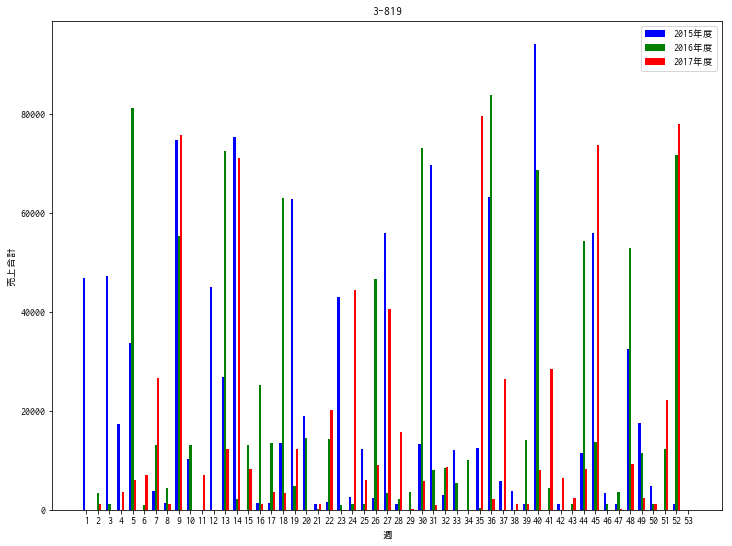

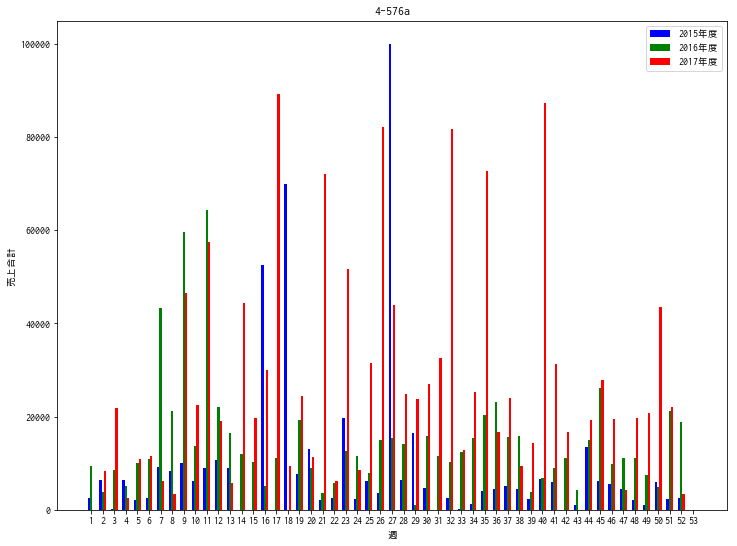

In [40]:
for shouhin in shouhins:
    tokuisaki = []
    for i, year in enumerate([2015, 2016, 2017]):
        tokuisaki.append(np.zeros(53))
        for day in data.query("年度 == @year and 商品コード == @shouhin").groupby(by='週').sum().index:
            tokuisaki[i][day - 1] = data.query(
                "年度 == @year and 商品コード == @shouhin").groupby(by='週').sum().loc[day, '売上']

    y1 = tokuisaki[0]
    y2 = tokuisaki[1]
    y3 = tokuisaki[2]
    title = shouhin
    xlabel = '週'
    ylabel = '売上合計'
    legend1 = '2015年度'
    legend2 = '2016年度'
    legend3 = '2017年度'
    output = 'shouhin_uriage_week'
    plot_three_bars(y1, y2, y3, title, xlabel, ylabel, legend1, legend2, legend3, output)

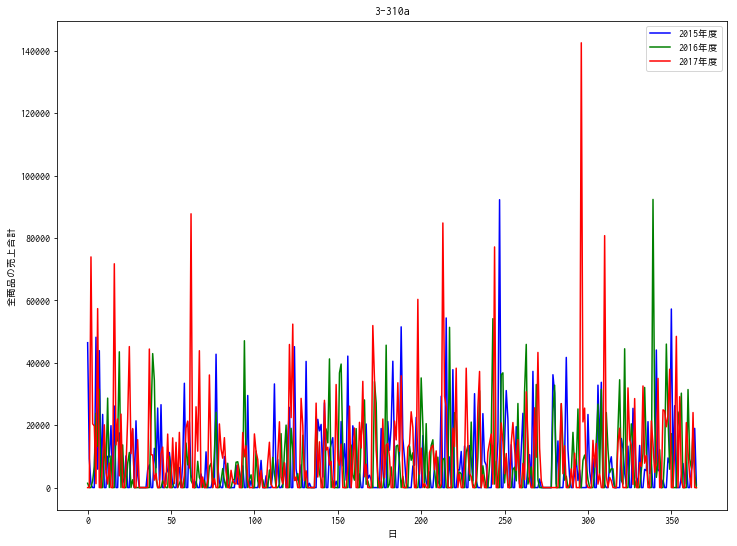

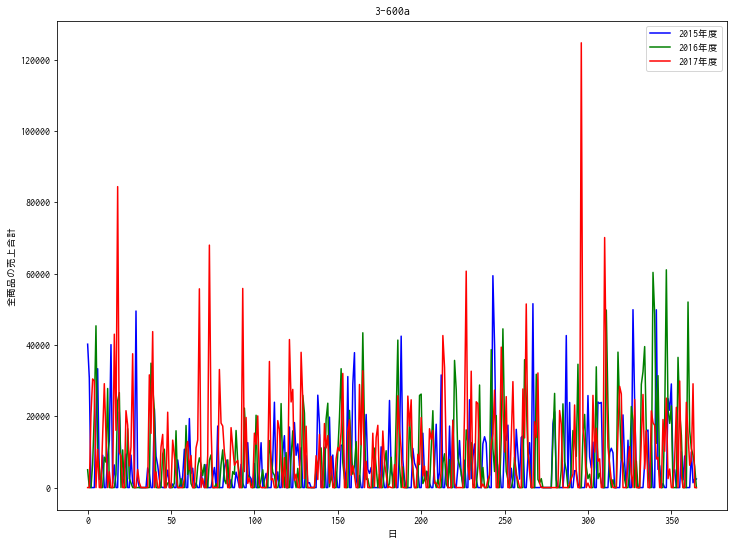

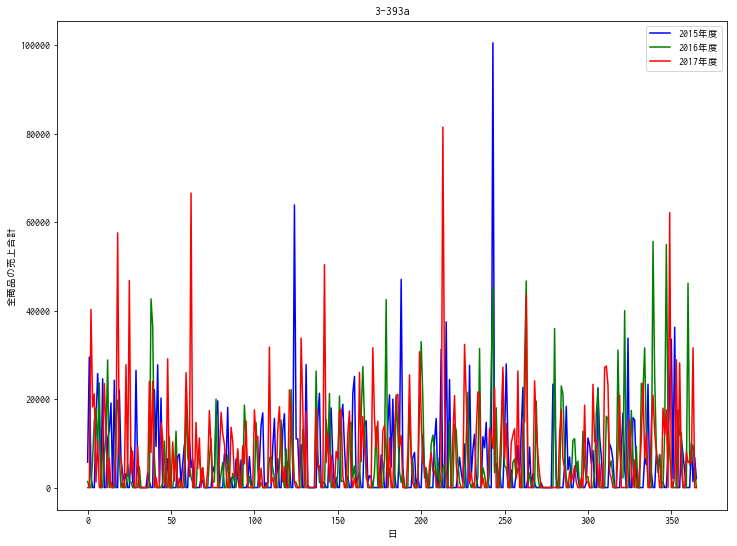

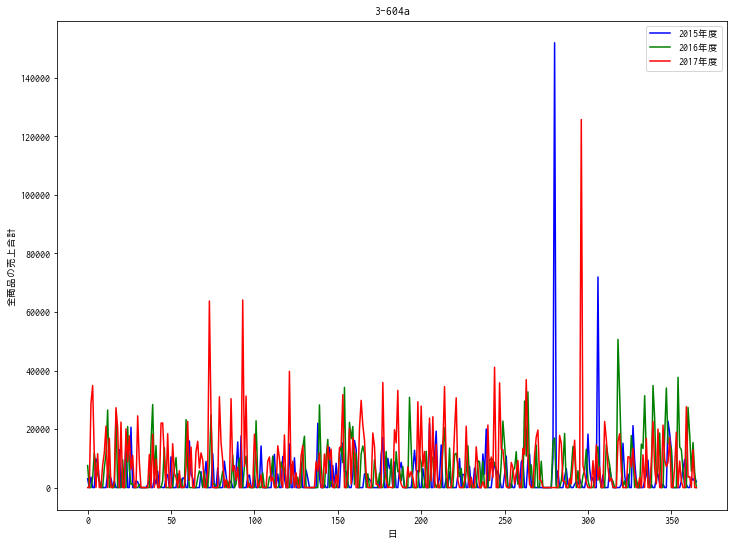

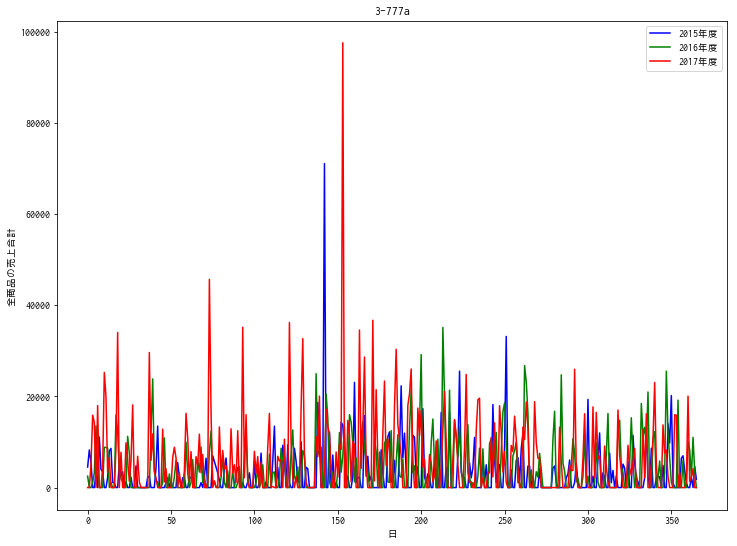

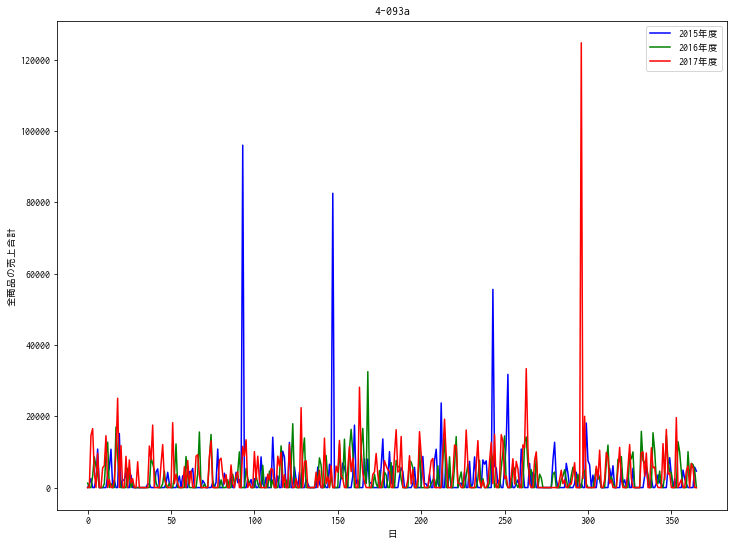

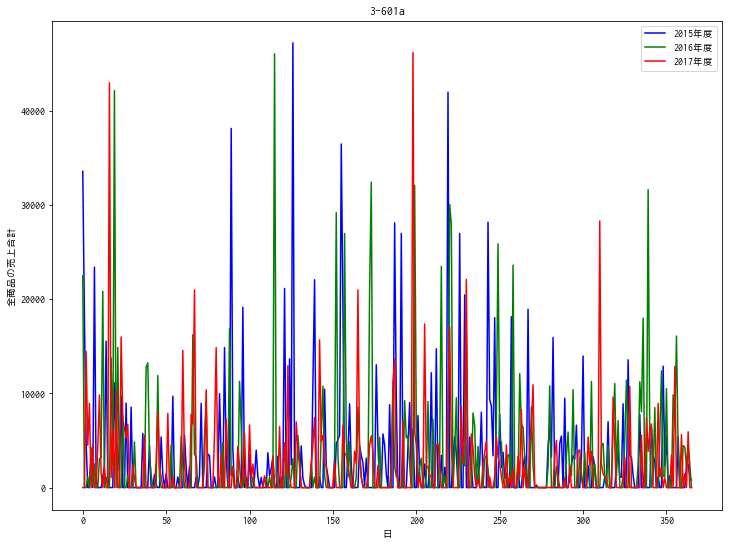

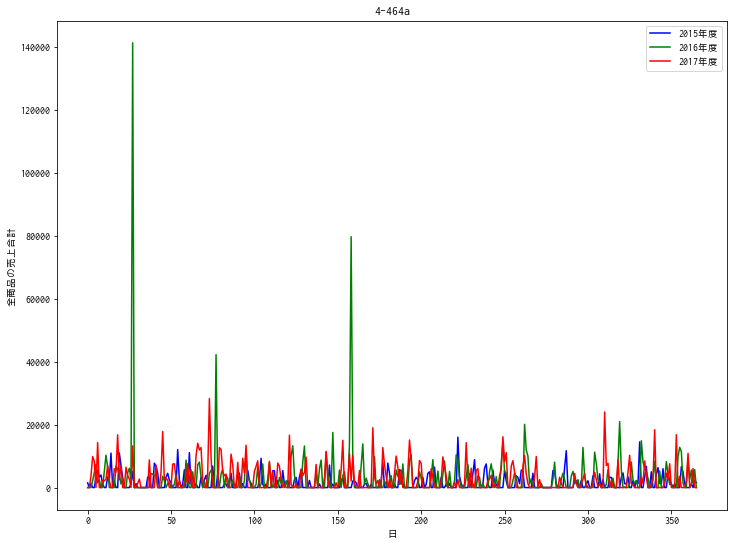

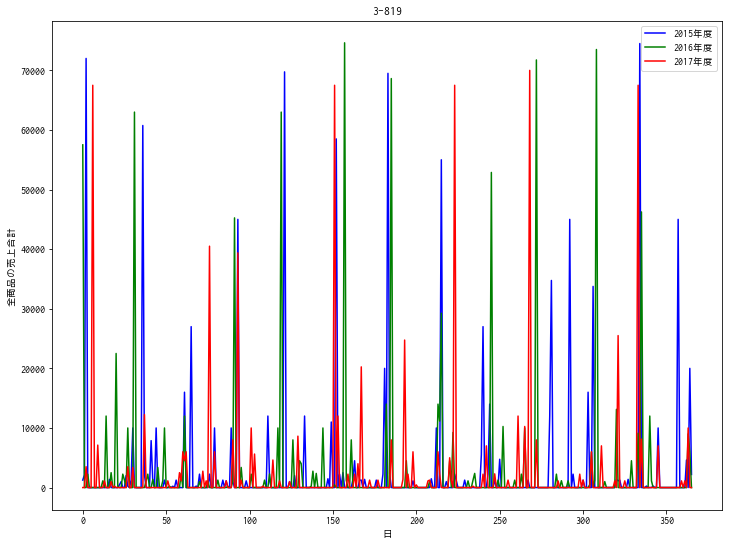

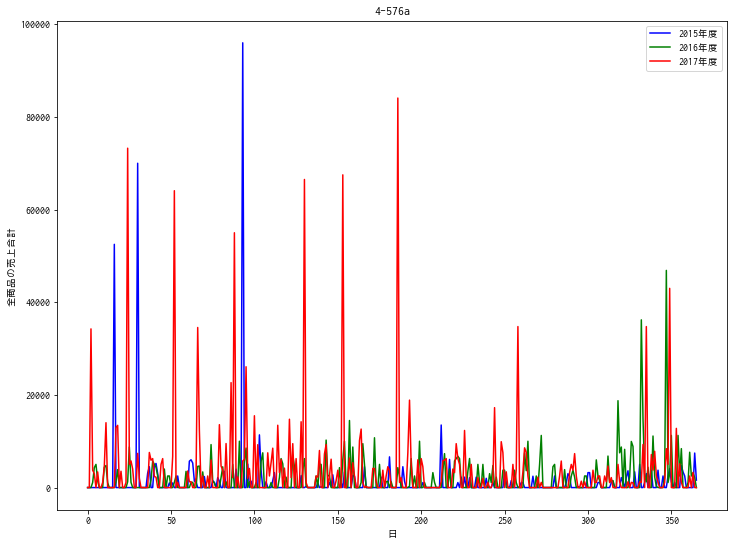

In [44]:
for shouhin in shouhins:
    tokuisaki = []
    for i, year in enumerate([2015, 2016, 2017]):
        tokuisaki.append(np.zeros(366))
        for day in data.query("年度 == @year and 商品コード == @shouhin").groupby(by='日').sum().index:
            tokuisaki[i][day - 1] = data.query(
                "年度 == @year and 商品コード == @shouhin").groupby(by='日').sum().loc[day, '売上']

    Y1 = tokuisaki[0]
    Y2 = tokuisaki[1]
    Y3 = tokuisaki[2]
    X = np.arange(len(Y1))

    plt.figure(figsize=(12, 9))
    plt.plot(X, Y1, color='b', label='2015年度')
    plt.plot(X, Y2, color='g', label='2016年度')
    plt.plot(X, Y3, color='r', label='2017年度')
    plt.legend(loc="best")
    plt.title(shouhin)
    plt.xlabel('日')
    plt.ylabel('全商品の売上合計')

    plt.savefig('shouhin_uriage_date', dpi=200)
    plt.show()

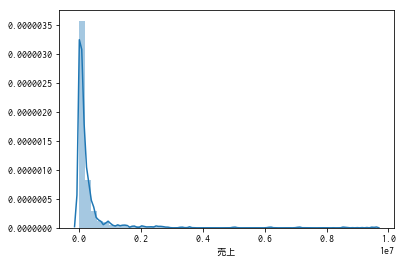

In [19]:
sns.distplot(data.groupby('商品コード').sum().sort_values('売上', ascending=False)['売上'])

In [58]:
data.groupby('商品コード').sum().sort_values('売上', ascending=False)[:int(len(data['商品コード'].unique())*0.1)]

,売上日,伝票No,数量,単価,売上,年,月,週,曜日,年度,日
商品コード,,,,,,,,,,,
3-310a,53031246400,547210944,42663,608551,9535325,5302945,17550,71993,6730,5302287,496673
3-600a,52830479034,545430999,37967,607263,8564990,5282873,17078,69948,6630,5282145,508972
3-393a,46861479018,483647019,31808,534554,7103255,4685992,15225,62402,5717,4685368,445748
3-604a,44403885701,459510280,27162,509795,6171130,4440240,14510,59447,5488,4439673,416088
3-777a,40691922894,420713999,22039,464820,5011320,4069045,14416,59267,5230,4068623,379307
4-093a,29117861484,301343416,15671,331840,3563945,2911686,9790,40146,3612,2911331,274837
3-601a,23549872424,242252301,14613,269234,3302665,2354906,7939,32655,2941,2354636,217022
4-464a,27726105418,286303422,12638,320830,2837565,2772520,8841,36096,3467,2772182,246899
3-819,6411586187,65886300,12327,72458,2707413,641137,2112,8642,931,641070,55138


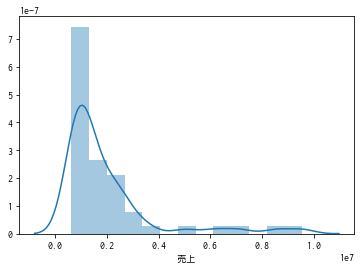

In [61]:
sns.distplot(data.groupby('商品コード').sum().sort_values('売上', ascending=False)['売上'][:int(len(data['商品コード'].unique())*0.1)])

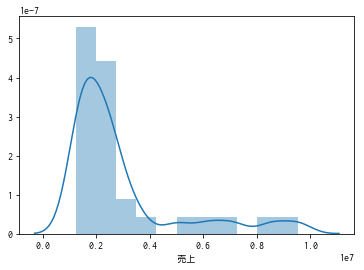

In [51]:
sns.distplot(data.groupby('商品コード').sum().sort_values('売上', ascending=False)['売上'][:30])

In [ ]:
tokuisaki = []

tokuisaki.append(np.zeros(12))
for day in data.query("年度 == 2015 and 商品コード == '3-310a'").groupby(by='月').sum().index:
    tokuisaki[0][day - 1] = data.query(
        "年度 == 2015 and 商品コード == '3-310a'").groupby(by='月').sum().loc[day, '売上']

tokuisaki.append(np.zeros(12))
for day in data.query("年度 == 2016 and 商品コード == '3-310a'").groupby(by='月').sum().index:
    tokuisaki[1][day - 1] = data.query(
        "年度 == 2016 and 商品コード == '3-310a'").groupby(by='月').sum().loc[day, '売上']

In [ ]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で1番購入金額が多かった商品(3-310a)の月毎の売上')
plt.xlabel('月')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_shouhin1_month', dpi=200)
plt.show()

In [ ]:
tokuisaki = []

tokuisaki.append(np.zeros(12))
for day in data.query("年度 == 2015 and 商品コード == '3-600a'").groupby(by='月').sum().index:
    tokuisaki[0][day - 1] = data.query(
        "年度 == 2015 and 商品コード == '3-600a'").groupby(by='月').sum().loc[day, '売上']

tokuisaki.append(np.zeros(12))
for day in data.query("年度 == 2016 and 商品コード == '3-600a'").groupby(by='月').sum().index:
    tokuisaki[1][day - 1] = data.query(
        "年度 == 2016 and 商品コード == '3-600a'").groupby(by='月').sum().loc[day, '売上']

In [ ]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で2番目に購入金額が多かった商品(3-600a)の月毎の売上')
plt.xlabel('月')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_shouhin2_month', dpi=200)
plt.show()

In [ ]:
tokuisaki = []

tokuisaki.append(np.zeros(12))
for day in data.query("年度 == 2015 and 商品コード == '3-393a'").groupby(by='月').sum().index:
    tokuisaki[0][day - 1] = data.query(
        "年度 == 2015 and 商品コード == '3-393a'").groupby(by='月').sum().loc[day, '売上']

tokuisaki.append(np.zeros(12))
for day in data.query("年度 == 2016 and 商品コード == '3-393a'").groupby(by='月').sum().index:
    tokuisaki[1][day - 1] = data.query(
        "年度 == 2016 and 商品コード == '3-393a'").groupby(by='月').sum().loc[day, '売上']

In [ ]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で3番購入金額が多かった商品(3-393a)の月毎の売上')
plt.xlabel('月')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_shouhin3_month', dpi=200)
plt.show()

In [ ]:
tokuisaki = []

tokuisaki.append(np.zeros(53))
for day in data.query("年度 == 2015 and 商品コード == '3-310a'").groupby(by='週').sum().index:
    tokuisaki[0][day - 1] = data.query(
        "年度 == 2015 and 商品コード == '3-310a'").groupby(by='週').sum().loc[day, '売上']

tokuisaki.append(np.zeros(53))
for day in data.query("年度 == 2016 and 商品コード == '3-310a'").groupby(by='週').sum().index:
    tokuisaki[1][day - 1] = data.query(
        "年度 == 2016 and 商品コード == '3-310a'").groupby(by='週').sum().loc[day, '売上']

In [ ]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で1番購入金額が多かった商品(3-310a)の週毎の売上')
plt.xlabel('週')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_shouhin1_week', dpi=200)
plt.show()

In [ ]:
tokuisaki = []

tokuisaki.append(np.zeros(53))
for day in data.query("年度 == 2015 and 商品コード == '3-600a'").groupby(by='週').sum().index:
    tokuisaki[0][day - 1] = data.query(
        "年度 == 2015 and 商品コード == '3-600a'").groupby(by='週').sum().loc[day, '売上']

tokuisaki.append(np.zeros(53))
for day in data.query("年度 == 2016 and 商品コード == '3-600a'").groupby(by='週').sum().index:
    tokuisaki[1][day - 1] = data.query(
        "年度 == 2016 and 商品コード == '3-600a'").groupby(by='週').sum().loc[day, '売上']

In [ ]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で2番目に購入金額が多かった商品(3-600a)の週毎の売上')
plt.xlabel('週')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_shouhin2_week', dpi=200)
plt.show()

In [ ]:
tokuisaki = []

tokuisaki.append(np.zeros(53))
for day in data.query("年度 == 2015 and 商品コード == '3-393a'").groupby(by='週').sum().index:
    tokuisaki[0][day - 1] = data.query(
        "年度 == 2015 and 商品コード == '3-393a'").groupby(by='週').sum().loc[day, '売上']

tokuisaki.append(np.zeros(53))
for day in data.query("年度 == 2016 and 商品コード == '3-393a'").groupby(by='週').sum().index:
    tokuisaki[1][day - 1] = data.query(
        "年度 == 2016 and 商品コード == '3-393a'").groupby(by='週').sum().loc[day, '売上']

In [ ]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で3番購入金額が多かった商品(3-393a)の週毎の売上')
plt.xlabel('週')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_shouhin3_week', dpi=200)
plt.show()

## 商品によっては、需要予測がまずまずの精度で可能なものがありそう